In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import functools
from IPython.display import Image, clear_output

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import tensorflow as tf
import pandas as pd
from data_info import *
from preprocessing_helpers import *
from datetime import datetime
%matplotlib inline
pd.set_option("display.precision", 2)
tf.random.set_seed(42)

In [2]:
new_iq_norm = [
                'precipitation_amt_mm',
                'reanalysis_air_temp_k',
                'reanalysis_avg_temp_k',
                'reanalysis_dew_point_temp_k',
                'reanalysis_max_air_temp_k',
                'reanalysis_min_air_temp_k',
                'reanalysis_precip_amt_kg_per_m2',
                'reanalysis_relative_humidity_percent',
                'reanalysis_sat_precip_amt_mm',
                'reanalysis_specific_humidity_g_per_kg',
                'reanalysis_tdtr_k',
                'station_avg_temp_c',
                'station_diur_temp_rng_c',
                'station_max_temp_c',
                'station_min_temp_c',
                'station_precip_mm',
]
new_iq_scale = [
                 'weekofyear',
]

extra_iq_cols = [
]
new_sj_norm = [
                'precipitation_amt_mm',
                'reanalysis_air_temp_k',
                'reanalysis_avg_temp_k',
                'reanalysis_dew_point_temp_k',
                'reanalysis_max_air_temp_k',
                'reanalysis_min_air_temp_k',
                'reanalysis_precip_amt_kg_per_m2',
                'reanalysis_relative_humidity_percent',
                'reanalysis_sat_precip_amt_mm',
                'reanalysis_specific_humidity_g_per_kg',
                'reanalysis_tdtr_k',
                'station_avg_temp_c',
                'station_diur_temp_rng_c',
                'station_max_temp_c',
                'station_min_temp_c',
                'station_precip_mm',
]
new_sj_scale = [
                 'weekofyear',
]

extra_sj_cols = [
]
new_iq_cols = [LABEL_COLUMN] + CATEGORICAL_COLUMNS + new_iq_norm + new_iq_scale + extra_iq_cols + [DATETIME_COLUMN]
new_iq_cols_no_label = CATEGORICAL_COLUMNS + new_iq_norm + new_iq_scale + extra_iq_cols + [DATETIME_COLUMN]
new_sj_cols = [LABEL_COLUMN] + CATEGORICAL_COLUMNS + new_sj_norm + new_sj_scale + extra_sj_cols + [DATETIME_COLUMN]
new_sj_cols_no_label = CATEGORICAL_COLUMNS + new_sj_norm + new_sj_scale + extra_sj_cols + [DATETIME_COLUMN]


sj_col_size = {
    'precipitation_amt_mm': 40,
    'reanalysis_air_temp_k': 16,
    'reanalysis_avg_temp_k': 15,
    'reanalysis_dew_point_temp_k': 39,
    'reanalysis_max_air_temp_k': 12,
    'reanalysis_min_air_temp_k': 21,
    'reanalysis_precip_amt_kg_per_m2': 30,
    'reanalysis_relative_humidity_percent': 34,
    'reanalysis_sat_precip_amt_mm': 40,
    'reanalysis_specific_humidity_g_per_kg': 14,
    'reanalysis_tdtr_k': 21,
    'station_avg_temp_c': 41,
    'station_diur_temp_rng_c': 40,
    'station_max_temp_c': 37,
    'station_min_temp_c': 26,
    'station_precip_mm': 32,
    'weekofyear': 3
}
iq_col_size = {
    'precipitation_amt_mm': 33,
    'reanalysis_air_temp_k': 10,
    'reanalysis_avg_temp_k': 4,
    'reanalysis_dew_point_temp_k': 6,
    'reanalysis_max_air_temp_k': 41,
    'reanalysis_min_air_temp_k': 40,
    'reanalysis_precip_amt_kg_per_m2': 3,
    'reanalysis_relative_humidity_percent': 7,
    'reanalysis_sat_precip_amt_mm': 33,
    'reanalysis_specific_humidity_g_per_kg': 26,
    'reanalysis_tdtr_k': 34,
    'station_avg_temp_c': 40,
    'station_diur_temp_rng_c': 26,
    'station_max_temp_c': 39,
    'station_min_temp_c': 25,
    'station_precip_mm':10,
    'weekofyear': 3
}

In [3]:
sj_datasets, sj_norm_scale, sj_columns = generate_lstm_data(
    train_file, 
    single_step=True, 
    history_size=52, 
    cols=new_sj_cols, 
    norm_cols=new_sj_norm, 
    scale_cols=new_sj_scale,
    extra_columns=extra_sj_cols,
    prepend_with_file=train_file,
    train_frac=1.0,
    group_by_column=True
)
sj_train_x, sj_train_y = sj_datasets[0]
sj_train_x = np.array(sj_train_x)
sj_train_y = np.array(sj_train_y)
iq_datasets, iq_norm_scale, iq_columns = generate_lstm_data(
    train_file, 
    single_step=True, 
    history_size=52, 
    cols=new_iq_cols, 
    norm_cols=new_iq_norm, 
    scale_cols=new_iq_scale,
    extra_columns=extra_iq_cols,
    prepend_with_file=train_file,
    train_frac=1.0,
    group_by_column=True
)
iq_train_x, iq_train_y = iq_datasets[1]
iq_train_x = np.array(iq_train_x)
iq_train_y = np.array(iq_train_y)
sj_columns

['precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm',
 'weekofyear']

In [4]:
sj_train_x[53][0]

array([-0.5192724 , -0.28312527, -0.01700562, -0.45251543, -0.63053403,
       -0.58375874, -0.72226811,  2.63011291, -0.36259787, -0.47408656,
       -0.29561382,  0.54225437, -0.4270842 , -0.05969375, -0.14734067,
        1.25932422, -0.06559743,  0.12831569, -0.14597828,  0.66464216,
        2.46231221,  0.36559815, -0.09329931,  0.36627934,  2.45822504,
        2.08311441,  1.50001264, -0.33671251, -0.34715748, -0.34624922,
       -0.03812262, -0.57513028, -0.80128658,  0.38966699, -0.80128658,
       -0.80128658, -0.44138926, -0.80128658, -0.80128658, -0.80128658,
       -0.80128658, -0.39143506, -0.80128658, -0.07944837, -0.80128658,
       -0.80128658, -0.80128658, -0.80128658, -0.50791918, -0.66504785,
        0.21074012, -0.05833137])

In [5]:
sj_train_x[53][0][-5:]

array([-0.80128658, -0.50791918, -0.66504785,  0.21074012, -0.05833137])

In [6]:
sj_train_y[53]

16.0

In [22]:
trimed_sj_x = []
trimed_iq_x = []

def trim_data(data, columns, size_cols):
    trimed_data = []
    for row_i in range(data.shape[0]):
        new_row = []
        for col_i, col in enumerate(columns):
            new_row = np.concatenate((new_row, data[row_i][col_i][-size_cols[col]:]), axis=None)

        trimed_data.append(new_row)
    return np.array(trimed_data)
    
trimed_sj_x = trim_data(sj_train_x, sj_columns, sj_col_size)
trimed_iq_x = trim_data(iq_train_x, iq_columns, iq_col_size)

print(trimed_sj_x.shape)
print(trimed_iq_x.shape)

(936, 461)
(520, 380)


In [23]:
BATCH_SIZE = 16
BUFFER_SIZE = 500
train_sj_data_single = tf.data.Dataset.from_tensor_slices((trimed_sj_x, sj_train_y))
train_sj_data_single = train_sj_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat(10)

# val_sj_data_single = tf.data.Dataset.from_tensor_slices((sj_val_x, sj_val_y))
# val_sj_data_single = val_sj_data_single.batch(BATCH_SIZE).repeat()

In [24]:
# Build network with 
def build_model(optimizer = None, nodes=256, input_shape=trimed_sj_x.shape[-1]):
  model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_shape),
    tf.keras.layers.Dense(nodes, activation='selu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(nodes/2, activation='selu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
  ])

  if not optimizer:
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.9999, amsgrad=False)

  model.compile(loss='mae',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [40]:
log_dir="logs/fit/lstm" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# create model
# optimizer = tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.01, nesterov=False, name='SGD')


# Train the Model.
EVALUATION_INTERVAL = 200
EPOCHS = 40

# opt = tf.keras.optimizers.Adam(learning_rate=0.1, beta_1=0.9, beta_2=0.9999, amsgrad=False)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="mae", factor=0.8, patience=3, min_lr=1e-6, verbose=1,
                                                     mode="max")

train_sj_data_single = tf.data.Dataset.from_tensor_slices((trimed_sj_x, sj_train_y))
train_sj_data_single = train_sj_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

opt = tf.keras.optimizers.RMSprop(
    learning_rate=0.01, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False,
    name='RMSprop'
)
sj_model = build_model(optimizer=opt, nodes=100)
history = sj_model.fit(
    train_sj_data_single,
    epochs=EPOCHS, 
    steps_per_epoch=EVALUATION_INTERVAL,
    verbose=1,
    callbacks=[tensorboard_callback, reduce_lr])

Train for 200 steps
Epoch 1/40
200/200 [==============================] - 2s 8ms/step - loss: 23.7863 - mae: 23.7890 - mse: 2517.7441
Epoch 2/40
200/200 [==============================] - 1s 6ms/step - loss: 18.7190 - mae: 18.7425 - mse: 1607.3472
Epoch 3/40
200/200 [==============================] - 1s 7ms/step - loss: 17.9971 - mae: 17.9999 - mse: 1277.6858
Epoch 4/40
195/200 [============================>.] - ETA: 0s - loss: 16.4501 - mae: 16.5119 - mse: 1163.1384
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.007999999821186066.
200/200 [==============================] - 1s 6ms/step - loss: 16.3970 - mae: 16.4565 - mse: 1147.7416
Epoch 5/40
200/200 [==============================] - 1s 6ms/step - loss: 14.9161 - mae: 14.9211 - mse: 896.2303
Epoch 6/40
200/200 [==============================] - 1s 6ms/step - loss: 15.0953 - mae: 15.1480 - mse: 943.2908
Epoch 7/40
192/200 [===========================>..] - ETA: 0s - loss: 14.1314 - mae: 14.1787 - mse: 753.7054
Epoch 00007

In [41]:
train_iq_data_single = tf.data.Dataset.from_tensor_slices((trimed_iq_x, iq_train_y))
train_iq_data_single = train_iq_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

EPOCHS = 40
# opt = tf.keras.optimizers.Adam(learning_rate=0.1, beta_1=0.9, beta_2=0.9999, amsgrad=False)
opt = tf.keras.optimizers.RMSprop(
    learning_rate=0.001, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False,
    name='RMSprop'
)
iq_model = build_model(optimizer=opt, nodes=70, input_shape=trimed_iq_x.shape[-1])
train_iq_data_single = tf.data.Dataset.from_tensor_slices((trimed_iq_x, iq_train_y))
train_iq_data_single = train_iq_data_single.cache().batch(BATCH_SIZE).repeat()

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="mae", factor=0.8, patience=5, min_lr=1e-6, verbose=1,
                                                     mode="max")
history = iq_model.fit(
    train_iq_data_single,
    epochs=EPOCHS, 
    steps_per_epoch=EVALUATION_INTERVAL,
    verbose=1,
    callbacks=[tensorboard_callback, reduce_lr])

Train for 200 steps
Epoch 1/40
200/200 [==============================] - 2s 8ms/step - loss: 6.6718 - mae: 6.7116 - mse: 132.9171
Epoch 2/40
200/200 [==============================] - 1s 6ms/step - loss: 6.2593 - mae: 6.3086 - mse: 125.8174
Epoch 3/40
200/200 [==============================] - 1s 6ms/step - loss: 6.0701 - mae: 6.1171 - mse: 122.8870
Epoch 4/40
200/200 [==============================] - 1s 6ms/step - loss: 6.0405 - mae: 6.0924 - mse: 121.3535
Epoch 5/40
200/200 [==============================] - 1s 6ms/step - loss: 5.8512 - mae: 5.8987 - mse: 118.6860
Epoch 6/40
198/200 [============================>.] - ETA: 0s - loss: 5.7696 - mae: 5.8209 - mse: 116.4274
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.000800000037997961.
200/200 [==============================] - 1s 6ms/step - loss: 5.7361 - mae: 5.7861 - mse: 115.3300
Epoch 7/40
200/200 [==============================] - 1s 6ms/step - loss: 5.6117 - mae: 5.6627 - mse: 113.9069
Epoch 8/40
200/200 [========

In [45]:
file = train_file
file = test_file

org_sj_test_data, test_scale, sj_columns = generate_lstm_data(
    file, history_size=52, 
    cols=new_sj_cols_no_label, 
    norm_cols=new_sj_norm, 
    scale_cols=new_sj_scale, 
    single_step=True, 
    train_frac=1.0, train_scale=sj_norm_scale, 
    prepend_with_file=train_file,
    extra_columns=extra_sj_cols,
    group_by_column=True
)
org_iq_test_data, test_scale, iq_columns = generate_lstm_data(
    file, history_size=52, 
    cols=new_iq_cols_no_label, 
    norm_cols=new_iq_norm, 
    scale_cols=new_iq_scale, 
    single_step=True, 
    train_frac=1.0, train_scale=iq_norm_scale, 
    prepend_with_file=train_file,
    extra_columns=extra_iq_cols,
    group_by_column=True
)
sj_test_x, sj_test_y = org_sj_test_data[0]
sj_test_x = np.array(sj_test_x)
sj_test_y = np.array(sj_test_y)
iq_test_x, iq_test_y = org_iq_test_data[1]
iq_test_x = np.array(iq_test_x)
iq_test_y = np.array(iq_test_y)
trimed_test_sj_x = trim_data(sj_test_x, sj_columns, sj_col_size)
trimed_test_iq_x = trim_data(iq_test_x, iq_columns, iq_col_size)
sj_test_set = tf.data.Dataset.from_tensor_slices((trimed_test_sj_x, sj_test_y)).batch(len(sj_test_y))
print(trimed_test_sj_x.shape)

sj_pred = []
for x, y in sj_test_set.take(1):
    predictions = sj_model.predict(x)
    sj_pred = predictions.flatten()
    print(len(predictions.flatten()))

(260, 461)
260


In [46]:
iq_test_set = tf.data.Dataset.from_tensor_slices((trimed_test_iq_x, iq_test_y)).batch(len(iq_test_y))
iq_pred = []
for x, y in iq_test_set.take(1):
    predictions = iq_model.predict(x)
    iq_pred = predictions.flatten()
    print(len(predictions.flatten()))

156


In [47]:
from preprocessing_helpers import export_test_to_csv
preds = np.concatenate((sj_pred, iq_pred), axis=None)
export_test_to_csv(predictions=preds,path=file, prefix='test' if file == test_file else 'train')

416
asas


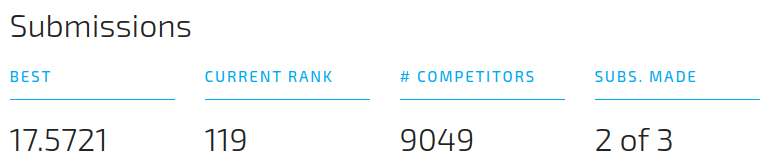

In [48]:
#Current Ranking (baseline)
Image("img/current-25-05.png")

In [15]:
# Tensorboard
# https://tensorboard.dev/experiment/rsdMubj0S165iOdLmbd13A/#scalars

In [49]:
# sj_model.save('models/sj_model_17.57MAP.h5') 
# iq_model.save('models/iq_model_17.57MAP.h5') 